# Assignment 4

### Import libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [ ]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [ ]:
#printing shapes of X_train, Y_train, X_test, and Y_test
print("X_train shape: ",X_train.shape)
print("Y_train shape: ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)
#printing types of X_train, Y_train, X_test, and Y_test
print("X_train type: ",type(X_train))
print("Y_train type: ",type(Y_train))
print("X_test type: ",type(X_test))
print("Y_test type: ",type(Y_test))
#interpretting the shapes
print("Index 0 in shape is the number of pictures in that data set. For train this is 60000 and test is 10000.")
print("In X_train and X_test, the 28s represent the dimensions of each image (28x28).")
#define list of strings of class names corresponding to each class
label_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)
X_train type:  <class 'numpy.ndarray'>
Y_train type:  <class 'numpy.ndarray'>
X_test type:  <class 'numpy.ndarray'>
Y_test type:  <class 'numpy.ndarray'>
Index 0 in shape is the number of pictures in that data set. For train this is 60000 and test is 10000.
In X_train and X_test, the 28s represent the dimensions of each image (28x28).


### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above).

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

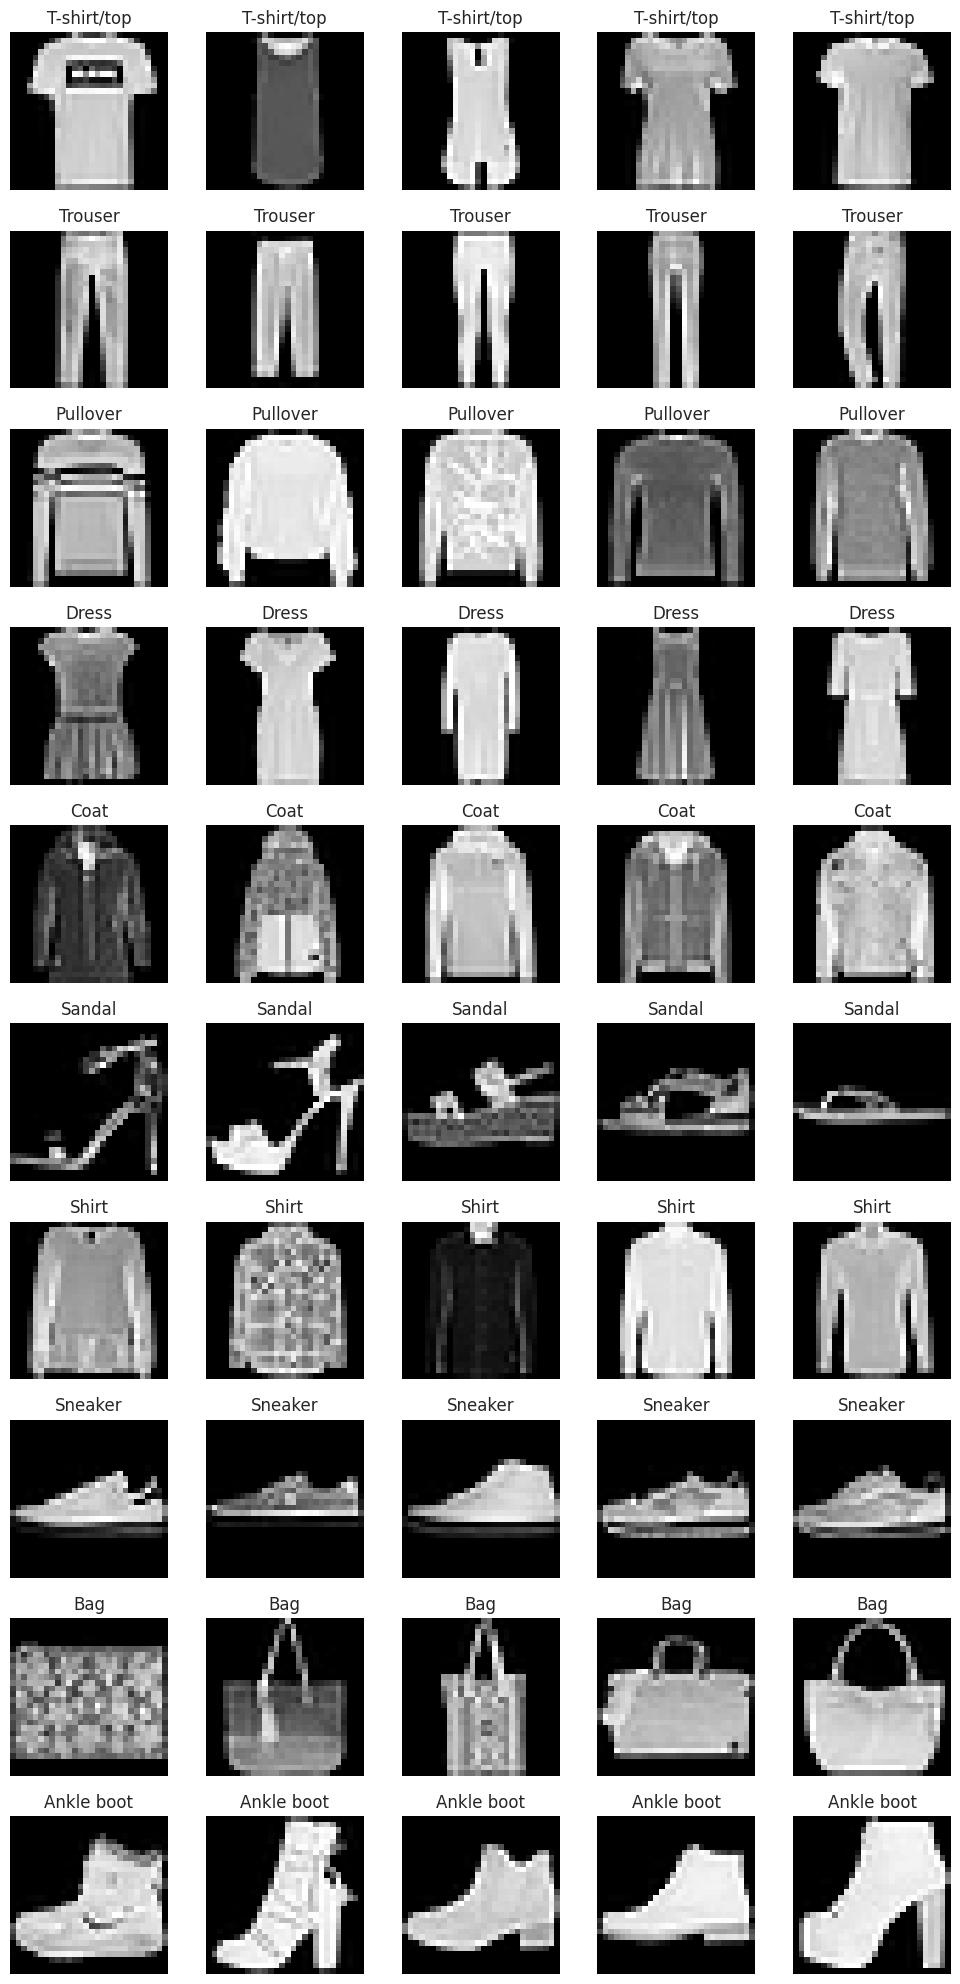

Minimum pixel value in X_train: 0
Maximum pixel value in X_train: 255


In [ ]:
#display first 5 img in X_train for each class in Y_train
fig, axes = plt.subplots(len(label_names), 5, figsize=(10, 20))
for i in range (10):
  class_indices = np.where(Y_train == i)[0][:5]
  for j, img_idx in enumerate(class_indices):
        ax = axes[i, j]
        ax.imshow(X_train[img_idx], cmap = 'gray')
        ax.set_title(label_names[i])
        ax.axis("off")
plt.tight_layout()
plt.show()
#determine min and max pixel values
min_val = X_train.min()
max_val = X_train.max()
print(f"Minimum pixel value in X_train: {min_val}")
print(f"Maximum pixel value in X_train: {max_val}")


---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms.

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [ ]:
#normalize values in X_train and X_test
X_train_mean = np.mean(X_train)
X_test_mean = np.mean(X_test)
X_train_std = np.std(X_train)
X_test_std = np.std(X_test)
X_train = (X_train - X_train_mean)/(X_train_std)
X_test = (X_test - X_test_mean)/(X_test_std)
#flatten the 2D 28x28 pixel array to a 1D array of size 784
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
#print out new shapes
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)


X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows:
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [ ]:
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

#overwriting values to be binary in Y_train and Y_test
Y_train[Y_train != 7] = 0
Y_train[Y_train == 7] = 1
Y_test[Y_test != 7] = 0
Y_test[Y_test == 7] = 1

### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. All the other arguments of the method are set to default values. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [ ]:
#split data in train, test, and val and print shapes
X_train_mini_np, X_val_np, Y_train_mini_np, Y_val_np = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1234)
X_train_mini = pd.DataFrame(X_train_mini_np)
Y_train_mini = pd.DataFrame(Y_train_mini_np)
X_val = pd.DataFrame(X_val_np)
Y_val = pd.DataFrame(Y_val_np)
print("X_train_mini Shape: ", X_train_mini.shape)
print("X_val Shape: ", X_val.shape)
print("Y_train_mini Shape: ", Y_train_mini.shape)
print("Y_val Shape: ", Y_val.shape)

X_train_mini Shape:  (48000, 784)
X_val Shape:  (12000, 784)
Y_train_mini Shape:  (48000, 1)
Y_val Shape:  (12000, 1)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative.

1. Use integer array indexing to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [ ]:
np.random.seed(0)
X_train_mini_reset = X_train_mini.reset_index(drop=True)
indices = X_train_mini_reset.index.to_numpy()
#reordering X_train_mini and Y_train_mini
indeces = X_train_mini.index.to_numpy()
shuffled_indeces = np.random.permutation(indeces)
X_train_mini = X_train_mini.reindex(shuffled_indeces)
Y_train_mini = Y_train_mini.reindex(shuffled_indeces)


---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

Overall Mean of Pixel Value for Sneaker Images:  -0.3335914493669981


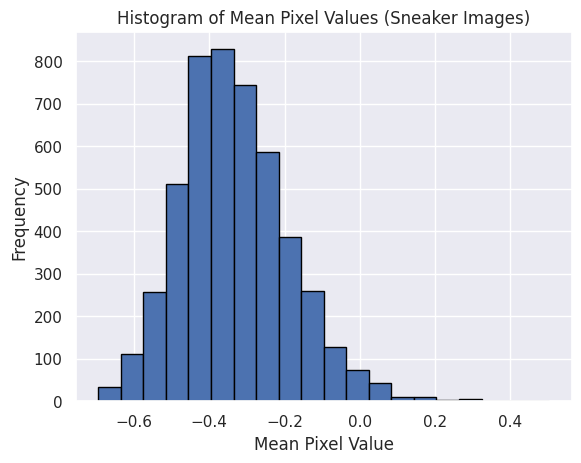

Overall Mean of Pixel Value for Non-Sneaker Images:  0.03671512658119501


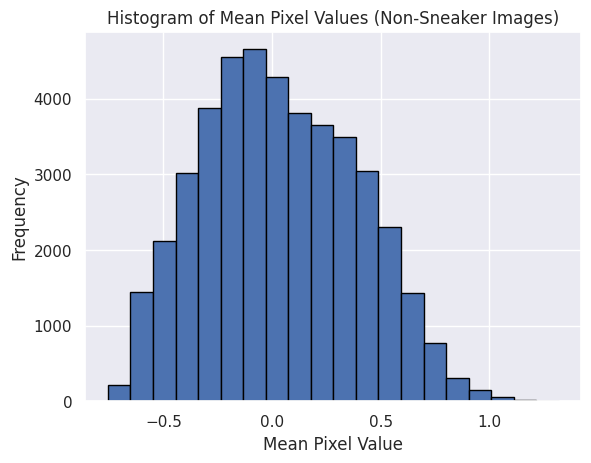

Based on these results, pixel value cannot accurately be used to distinguish sneaker and non-sneaker images.
The mean value distribution shown in the histogram is nearly very distinct for both sneaker and non-sneaker images.
The overall mean is negative for sneaker images, and barely above zero for non-sneaker images.
It is unclear whether other types of image classes will have similar pixel values to non-sneaker images.
We do not know which way the other classes pull the average either.


In [ ]:
#identify all sneaker images in X_train_mini and calculate mean pixel value for each img
indeces = Y_train_mini[Y_train_mini[0] == 1].index
X_train_mini_sneaker = X_train_mini.loc[indeces]
X_train_mini_sneaker_means = X_train_mini_sneaker.mean(axis = 1)
#plot and print
print("Overall Mean of Pixel Value for Sneaker Images: ", X_train_mini_sneaker_means.mean())
plt.hist(X_train_mini_sneaker_means, bins=20, edgecolor="black")
plt.title("Histogram of Mean Pixel Values (Sneaker Images)")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.show()
#do same for non-sneaker images
indeces_not = Y_train_mini[Y_train_mini[0] == 0].index
X_train_mini_sneaker_not = X_train_mini.loc[indeces_not]
X_train_mini_sneaker_not_means = X_train_mini_sneaker_not.mean(axis = 1)
print("Overall Mean of Pixel Value for Non-Sneaker Images: ", X_train_mini_sneaker_not_means.mean())
plt.hist(X_train_mini_sneaker_not_means, bins=20, edgecolor="black")
plt.title("Histogram of Mean Pixel Values (Non-Sneaker Images)")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")
plt.show()
print("Based on these results, pixel value cannot accurately be used to distinguish sneaker and non-sneaker images.")
print("The mean value distribution shown in the histogram is nearly very distinct for both sneaker and non-sneaker images.")
print("The overall mean is negative for sneaker images, and barely above zero for non-sneaker images.")
print("It is unclear whether other types of image classes will have similar pixel values to non-sneaker images.")
print("We do not know which way the other classes pull the average either.")

---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini? Print out your answer.
2. What is the number of non-sneaker images in Y_train_mini? Print out your answer.
3. What is the majority class in Y_train_mini? Print out your answer.
4. What is the accuracy of a majority class classifier for Y_train_mini? Print out your answer.
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helper.ipynb``; You should use **np.log()** when implementing the log loss function.

In [ ]:
print("Number of Sneaker Images in Y_train_mini: ", len(indeces))
print("Number of Non-Sneaker Images in Y_train_mini: ", len(indeces_not))
print("The majority class is the non-sneaker images.")
#calculating accuracy
accuracy = float(len(indeces_not)/len(Y_train_mini))
print("The accuracy is: ", accuracy)
def logloss(actual, pred):
  #convert both to np array
  actual = np.array(actual)
  pred = np.array(pred)
  #log loss equation
  loss = -np.mean( (actual*np.log(pred)) + ((1-actual)*np.log(1-pred)) )
  return loss
#calculate log loss for Y_train_mini
train_base = np.full(Y_train_mini.shape[0], 0.1)
train_loss = logloss(Y_train_mini.values.flatten(), train_base)
print("Y_train log loss: ", train_loss)
#calculate log loss for Y_val
val_base = np.full(Y_val.shape[0], 0.1)
val_loss = logloss(Y_val.values.flatten(), val_base)
print("Y_val log loss: ", val_loss)

Number of Sneaker Images in Y_train_mini:  4800
Number of Non-Sneaker Images in Y_train_mini:  43200
The majority class is the non-sneaker images.
The accuracy is:  0.9
Y_train log loss:  0.3250829733914482
Y_val log loss:  0.3250829733914482


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method.
4. Generate a (1,2) plot (for the mini training and validation data). In the subplot at position (1, 1), display the loss values on the y-axis and the epoch number on the x-axis. In the subplot at position (1, 2), display the accuracy values on the y-axis and the epoch number on the x-axis. Hint: check what the [tf.keras.Model.fit()](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns.

In [ ]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        # output dim
      input_shape= (num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='sigmoid',
      kernel_initializer=tf.keras.initializers.ones(),  # initialize params to 1
      bias_initializer=tf.keras.initializers.ones(),    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch GD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric (!!!). This finalizes the graph for training.
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4459 - loss: 140.4909 - val_accuracy: 0.4638 - val_loss: 130.1712
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4688 - loss: 125.4700 - val_accuracy: 0.4853 - val_loss: 115.8739
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4914 - loss: 111.5047 - val_accuracy: 0.5103 - val_loss: 102.6353
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5145 - loss: 98.6129 - val_accuracy: 0.5339 - val_loss: 90.4997
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5396 - loss: 86.8408 - val_accuracy: 0.5587 - val_loss: 79.5270


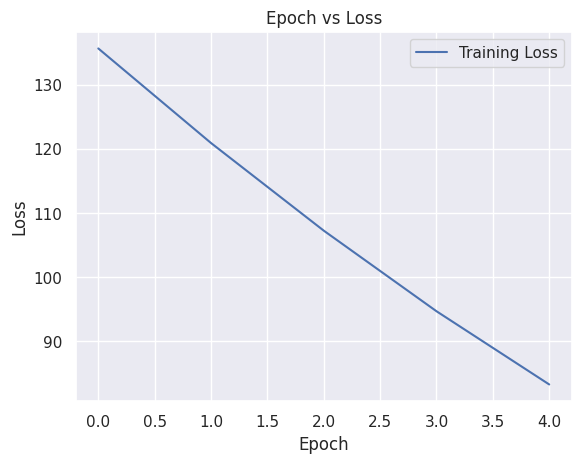

In [ ]:
tf.random.set_seed(0)
# 2. Build and compile model
model_tf = build_model(784, learning_rate=0.0001)

# 3. Fit the model
history = model_tf.fit(X_train_mini, Y_train_mini, validation_data=(X_val, Y_val), epochs = 5, batch_size = 32)

# 4. Generate (1,2) plot
plt.plot(history.history["loss"], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the **learning rate** and **number of epochs** hyperparameters of *model_tf* to determine the setup that yields the most optimal generalization performance. Feel free to explore various values for these hyperparameters. Generate a (1, 2) subplot to visualize the training and validation loss on the left, and training and validation accuracy on the right, across all epochs. Hint: you can manually test different hyperparameter values or you can use the [Keras Tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner). If you decide to work with the Keras Tuner, define a new model building function named <span style="color:chocolate">build_model_tuner()</span>.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (including the bias term);
3. The final-epoch loss on both the mini training and validation datasets;
4. The difference between the final-epoch training and validation losses;
5. Compare the final-epoch training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?

Please note that we will consider 'optimal model configuration' any last-epoch training and validation loss that is below 0.08.

In [ ]:
tf.random.set_seed(0)
model_tf = build_model(784, learning_rate=0.005)
history = model_tf.fit(X_train_mini, Y_train_mini, validation_data=(X_val, Y_val), epochs = 42, batch_size = 32)

print("Learned Parameters (Including Bias as Final Term):")
print(model_tf.layers[0].get_weights())

print("Loss at Final Epoch on Training Dataset: ", 0.0784)
print("Loss at Final Epoch on Validation Dataset: ", 0.0745)

print("Difference Between Last-Epoch Loss b/w Training and Validation: ", 0.0039)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6726 - loss: 60.7537 - val_accuracy: 0.8886 - val_loss: 5.1587
Epoch 2/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 3.3583 - val_accuracy: 0.9442 - val_loss: 1.7589
Epoch 3/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9489 - loss: 1.4911 - val_accuracy: 0.9513 - val_loss: 1.3002
Epoch 4/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9543 - loss: 1.1574 - val_accuracy: 0.9548 - val_loss: 1.0586
Epoch 5/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9578 - loss: 0.9737 - val_accuracy: 0.9567 - val_loss: 0.8948
Epoch 6/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9593 - loss: 0.8377 - val_accuracy: 0.9578 - val_loss: 0.7644
Epoch 7/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9601 - loss: 0.7269 - val_accuracy: 0.9585 - val_loss: 0.6619
Epoch 8/42
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9612 - loss: 0.6378 -

---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations for training vs. test datasets.

In [ ]:
#calculating aggregate accuracy
trainacc = model_tf.evaluate(X_train_mini, Y_train_mini)[1]
print(X_train_mini.shape)
print(Y_train_mini.shape)
print("Aggregate Accuracy Train: ", trainacc)
Y_test = np.array(Y_test).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,784)
testacc = model_tf.evaluate(X_test, Y_test)[1]
print("Aggregate Accuracy Test: ", testacc)
print("This model demonstrates strong aggreegate generalization capabilities.")
print("Both aggregate accuracies are close in value at 98%. This shows that it is not overfitted.")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9819 - loss: 0.0714
(48000, 784)
(48000, 1)
Aggregate Accuracy Train:  0.9820208549499512
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9815 - loss: 0.0737
Aggregate Accuracy Test:  0.9804999828338623
This model demonstrates strong aggreegate generalization capabilities.
Both aggregate accuracies are close in value at 98%. This shows that it is not overfitted.


### <span style="color:chocolate">Exercise 12:</span> Fairness evaluation (10 points)

1. Generate and visualize the confusion matrix on the test dataset using a probability threshold of 0.5. Additionally, print the True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN). Hint: you can utilize the <span style="color:chocolate">model.predict()</span> method available in tf.keras, and then the <span style="color:chocolate">confusion_matrix()</span>, <span style="color:chocolate">ConfusionMatrixDisplay()</span> methods available in sklearn.metrics;

2. Compute subgroup accuracy, separately for the sneaker and non-sneaker classes, on the test dataset using a probability threshold of 0.5. Reflect on any observed accuracy differences (potential lack of fairness) between the two classes.

3. Does the model demonstrate strong subgroup generalization capabilities? Provide an explanation based on your accuracy observations. Hint: compare training vs. test accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
True Negative (TN):  8900
False Positive (FP):  100
False Negative (FN):  95
True Positive (TP):  905
Non-Sneaker Accuracy Test:  0.9888888888888889
Sneaker Accuracy Test:  0.905
There is a lack of fairness. It appears to be much better at detecting non-sneakers than sneakers.
There are also more images that are non-sneaker. This gives it more opportunity to detect correctly.
The training data accuracy for detecting sneaker pictures was 90%.
The test data accuracy is also about 90.5%. This shows the model has good generalization capabilities.


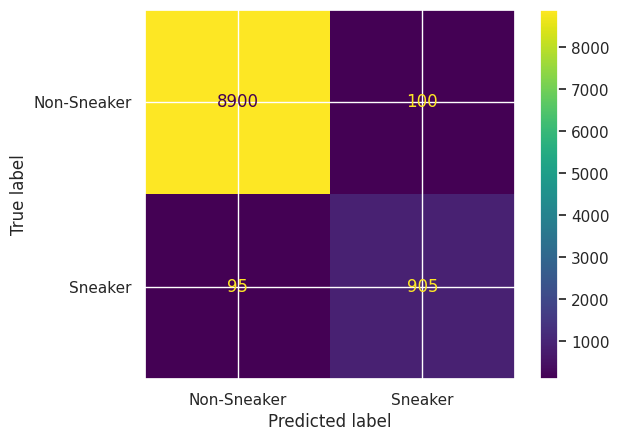

In [ ]:
#generate and visualize confusion matrix on test dataset
Y_prob = model_tf.predict(X_test)
Y_pred = (Y_prob >= 0.5).astype(int)  # convert probabilities to 0 or 1
confmat = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=["Non-Sneaker","Sneaker"])
display.plot()
TN = confmat[0][0]
FP = confmat[0][1]
FN = confmat[1][0]
TP = confmat[1][1]
print("True Negative (TN): ", TN)
print("False Positive (FP): ", FP)
print("False Negative (FN): ", FN)
print("True Positive (TP): ", TP)
#compute subgroup accuracy for sneaker and non sneaker classes on test dataset
nonsneaker_acc = TN/(TN + FP)
sneaker_acc = TP/(FN + TP)
print("Non-Sneaker Accuracy Test: ", nonsneaker_acc)
print("Sneaker Accuracy Test: ", sneaker_acc)
print("There is a lack of fairness. It appears to be much better at detecting non-sneakers than sneakers.")
print("There are also more images that are non-sneaker. This gives it more opportunity to detect correctly.")
print("The training data accuracy for detecting sneaker pictures was 90%.")
print("The test data accuracy is also about 90.5%. This shows the model has good generalization capabilities.")
